Act1: Optimización multidimensional mediante gradiente

Enrique García Varlea

In [ ]:
import numpy as np
from matplotlib import pyplot
from sympy import *

Algrotimo optimización por gradiente para la función $f(x,y) = -3(x-2)^2 - (y-3)^2$. Evaluada en el punto $(1,1)$ y con $\lambda = 0.25$:

Paso 1\) cálcular la máxima pendiente y su magnitud:
$\nabla f(x,y) = -6(x-2)i -2(y-3)j$
Con condiciones iniciales queda $6i + 4j$


P0: [1 1], e: -3.0, f: -7
P1: [2.5 2. ], e: -3.0, f: -1.75
P2: [1.75 2.5 ], e: -3.0, f: -0.4375
P3: [2.125 2.75 ], e: -3.0, f: -0.109375
P4: [1.9375 2.875 ], e: -3.0, f: -0.02734375
P5: [2.03125 2.9375 ], e: -3.0, f: -0.0068359375
P6: [1.984375 2.96875 ], e: -3.0, f: -0.001708984375
P7: [2.0078125 2.984375 ], e: -3.0, f: -0.00042724609375
P8: [1.99609375 2.9921875 ], e: -3.0, f: -0.0001068115234375
P9: [2.00195312 2.99609375], e: -3.0, f: -2.6702880859375e-05
P10: [1.99902344 2.99804688], e: -3.0, f: -6.67572021484375e-06
P11: [2.00048828 2.99902344], e: -3.0, f: -1.6689300537109375e-06
P12: [1.99975586 2.99951172], e: -3.0, f: -4.172325134277344e-07
P13: [2.00012207 2.99975586], e: -3.0, f: -1.043081283569336e-07
P14: [1.99993896 2.99987793], e: -3.0, f: -2.60770320892334e-08
P15: [2.00003052 2.99993896], e: -3.0, f: -6.51925802230835e-09
P16: [1.99998474 2.99996948], e: -3.0, f: -1.6298145055770874e-09
P17: [2.00000763 2.99998474], e: -3.0, f: -4.0745362639427185e-10
P18: [1.99999619

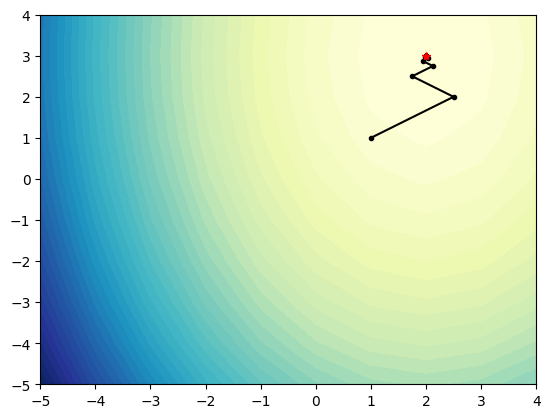

In [ ]:
#parámetros inicales
f = lambda x, y: -3*(x-2)**2 - (y-3)**2
p = [np.array([1,1])]

grad_i = lambda x: -6 * (x - 2)
grad_j = lambda y: -2 * (y - 3)

a = symbols('a') #lambda variable
error = []

def optimizer_gradient(l):
  for i in range(31):
    #Cacular gradiente
    grad = np.array([grad_i(p[i][0]), grad_j(p[i][1])])

    if type(l) == float:
      p.append(p[i] + l * grad)

    else: 
      #Calcluar lambda para cada iteración
      px = p[i][0] + l * grad[0]
      py = p[i][1] + l * grad[1]
      lam = solve(diff( f(px, py), l))

      p.append(p[i] + lam * grad)


    error.append((f(p[i+1][0], p[i+1][1]) - f(p[i][0], p[i][1])) / f(p[i+1][0], p[i+1][1]))
    print('P{}: {}, e: {}, f: {}'.format(i, p[i], error[i],f(p[i][0], p[i][1]) ))

  # Plot the path
  # sample input range uniformly
  xaxis = np.arange(-5, 5)
  yaxis = np.arange(-5, 5)

  # create a mesh from the axis
  x, y = np.meshgrid(xaxis, yaxis)

  # compute targets
  results = f(x, y)
  results_ok = f(np.array(p)[:,0], np.array(p)[:,1])

  # create a filled contour plot with 50 levels and color scheme
  pyplot.contourf(x, y, results, levels=50, cmap='YlGnBu_r')

  # plot the sample as black circles
  pyplot.plot(np.array(p)[:,0], np.array(p)[:,1], '.-', color='black')

  # draw the function optima as  star
  #pyplot.plot(error[5], '*', color='red')
  pyplot.plot(np.array(p)[-1,0], np.array(p)[-1,1], '*', color='red')

  # show the plot
  pyplot.show()
  
  return p 

p = optimizer_gradient(0.25)

Ahora optimizador con $\lambda$ variable

P0: [1 1], e: 3.5208333333333353, f: -7
P1: [2.25806452 1.83870968], e: 3.52083333333334, f: -1.5483870967741928
P2: [1.77880184 2.55760369], e: 3.5208333333333512, f: -0.34250037163668734
P3: [2.0570834  2.74312472], e: 3.520833333333333, f: -0.07576045086894437
P4: [1.95107138 2.90214275], e: 3.5208333333333712, f: -0.016758072081609815
P5: [2.01262674 2.94317966], e: 3.520833333333286, f: -0.0037068546539966102
P6: [1.98917708 2.97835416], e: 3.5208333333332535, f: -0.0008199494165522542
P7: [2.00279301 2.98743145], e: 3.5208333333329547, f: -0.00018137129951386588
P8: [1.99760599 2.99521198], e: 3.520833333333752, f: -4.011899712749443e-05
P9: [2.00061781 2.99721986], e: 3.520833333334417, f: -8.874248212532508e-06
P10: [1.99947045 2.9989409 ], e: 3.520833333329542, f: -1.962967346550499e-06
P11: [2.00013666 2.99938504], e: 3.5208333333321478, f: -4.3420475868434546e-07
P12: [1.99988286 2.99976573], e: 3.5208333333259887, f: -9.604529224356704e-08
P13: [2.00003023 2.99986397], e: 3

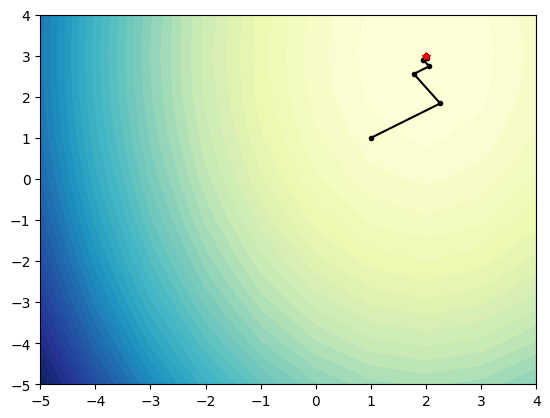

In [ ]:
#parámetros inicales
f = lambda x, y: -3*(x-2)**2 - (y-3)**2
p = [np.array([1,1])]

grad_i = lambda x: -6 * (x - 2)
grad_j = lambda y: -2 * (y - 3)

a = symbols('a') #lambda variable
error = []

def optimizer_gradient(l):
  for i in range(31):
    #Cacular gradiente
    grad = np.array([grad_i(p[i][0]), grad_j(p[i][1])])

    if type(l) == float:
      p.append(p[i] + l * grad)

    else: 
      #Calcluar lambda para cada iteración
      px = p[i][0] + l * grad[0]
      py = p[i][1] + l * grad[1]
      lam = solve(diff( f(px, py), l))
      p.append(p[i] + float(lam[0]) * grad)


    error.append(abs((f(p[i+1][0], p[i+1][1]) - f(p[i][0], p[i][1])) / f(p[i+1][0], p[i+1][1])))
    print('P{}: {}, e: {}, f: {}'.format(i, p[i], error[i],f(p[i][0], p[i][1]) ))

  # Plot the path
  # sample input range uniformly
  xaxis = np.arange(-5, 5)
  yaxis = np.arange(-5, 5)

  # create a mesh from the axis
  x, y = np.meshgrid(xaxis, yaxis)

  # compute targets
  results = f(x, y)
  results_ok = f(np.array(p)[:,0], np.array(p)[:,1])

  # create a filled contour plot with 50 levels and color scheme
  pyplot.contourf(x, y, results, levels=50, cmap='YlGnBu_r')

  # plot the sample as black circles
  pyplot.plot(np.array(p)[:,0], np.array(p)[:,1], '.-', color='black')

  # draw the function optima as  star
  #pyplot.plot(error[5], '*', color='red')
  pyplot.plot(np.array(p)[-1,0], np.array(p)[-1,1], '*', color='red')

  # show the plot
  pyplot.show()
  
  return p 

p = optimizer_gradient(a)